<a href="https://colab.research.google.com/github/Niho37/M516-Business-Project-in-Big-Data-AI/blob/main/M516_Business_Project_in_Big_Data_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment Submission Form

# Introduction





To the agricultural industry, healthy crops are essential. One of the most important crops in the world is corn, which has been referred to as maize in other parts. Nevertheless, many leaf diseases are common among corn, affecting yield and quality. Disease detection traditionally involves tedious manpower and is prone to error as it depends on man-eye inspection. However, there is a chance to transform the process with the advent of artificial intelligence and machine learning.

Corn leaf disease detection is undertaken using convolutional neural networks, which are widely used for image recognition and categorization. To this end, it will train a model on the ‘Corn or Maize Leaf Disease Dataset’ obtained from Kaggle to recognize the corn leaf diseases under consideration. This method is concerned with technical accuracy and has also addressed sustainability in agriculture.%://response/Geplaatst/.

The dataset provides different pictures with the respective disease types, which forms a good base for creating an efficient AI model. This project seeks to build a disease classification model by taking advantage of the abilities of the InceptionV3 architecture inside the TensorFlow platform. Therefore, this project will develop a solution to incorporate rapid, accurate, and low-cost disease monitoring in agriculture for prompt disease treatment and management systems of corn plants.

This report will explain how the model was developed, including data preparation, model architecture, training, and evaluation. It will also provide the findings and their interpretations about smart farming and eco-friendly agriculture.

# Data Sources


The cornerstone of this project is the "Corn or Maize Leaf Disease Dataset" obtained from Kaggle, a well-known platform for data science and machine learning competitions. The primary dataset for this project, the 'Corn or Maize Leaf Disease Dataset,' was accessed through Kaggle. The dataset can be directly downloaded or accessed via the following link: [Corn or Maize Leaf Disease Dataset](https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/data). This dataset is a comprehensive collection of high-resolution images of corn leaves with various disease manifestations, providing a robust foundation for training the CNN model.

## Characteristics of the dataset
**Content**

The dataset comprises a comprehensive collection of high-resolution images of corn leaves. Each image in this dataset is labeled with one of the several types of diseases that commonly affect corn crops, such as Blight, Common Rust and Gray Leaf Spot.

**Variety and Volume**

The dataset contains thousands of images, ensuring a wide variety of examples for each disease category. This diversity is critical for training a robust model capable of recognizing subtle differences and similarities across different disease manifestations.

**Image Quality**

The images are of high quality and resolution, which is vital for detailed feature extraction by the CNN model. High-resolution images allow for better recognition of intricate patterns and anomalies on the leaves, which are indicative of specific diseases.


## Import Data

In [ ]:
import os
import time
import pandas as pd
# from fastai.callbacks import ActivationStats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import random
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import load_model, Model, Sequential
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import numpy as np
from glob import glob


In [ ]:
# useful for getting number of output classes, how many classes there are or sorts of mushrooms
folders = glob('/content/drive/MyDrive/Plant/*')
class_names = os.listdir("/content/drive/MyDrive/Plant")
class_names
# check if correct dataset is used and length
len(class_names)
#class_names
print(class_names)
print(folders)

['Healthy', 'Gray_Leaf_Spot', 'Common_Rust', 'Blight']
['/content/drive/MyDrive/Plant/Healthy', '/content/drive/MyDrive/Plant/Gray_Leaf_Spot', '/content/drive/MyDrive/Plant/Common_Rust', '/content/drive/MyDrive/Plant/Blight']


Class names: ['Healthy', 'Gray_Leaf_Spot', 'Common_Rust', 'Blight']


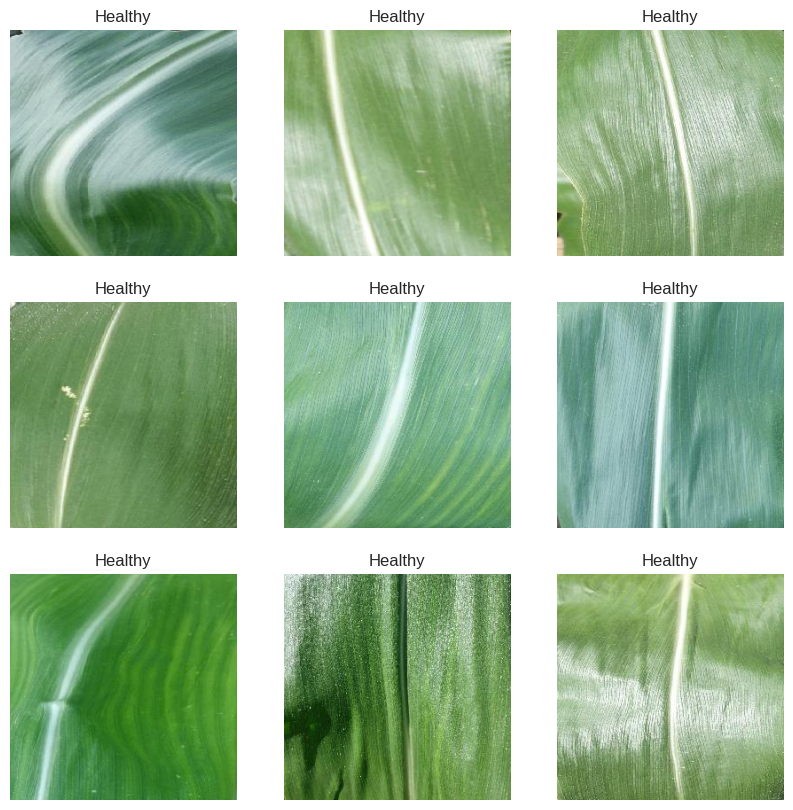

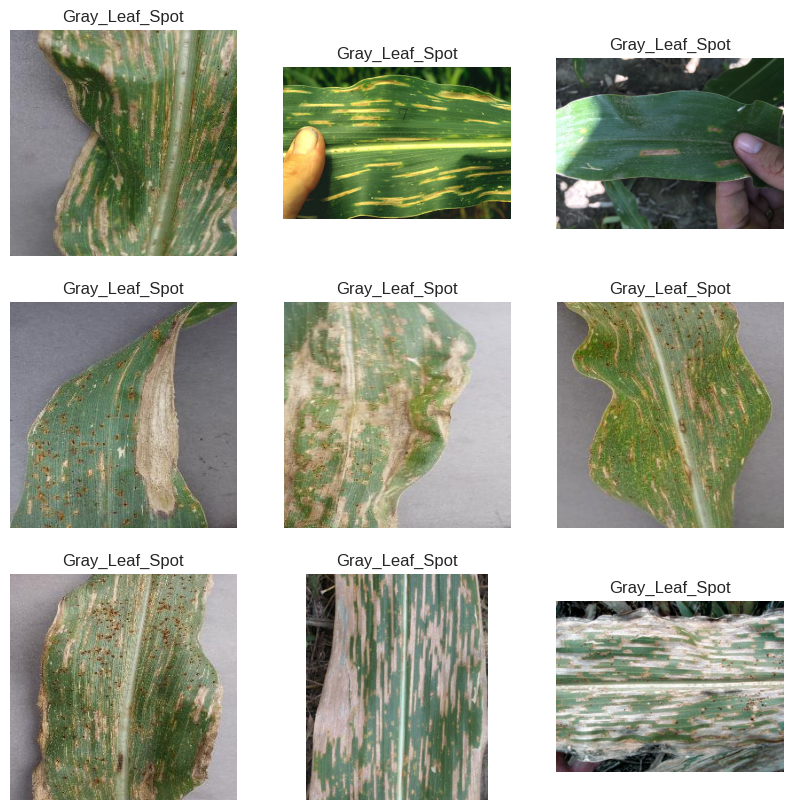

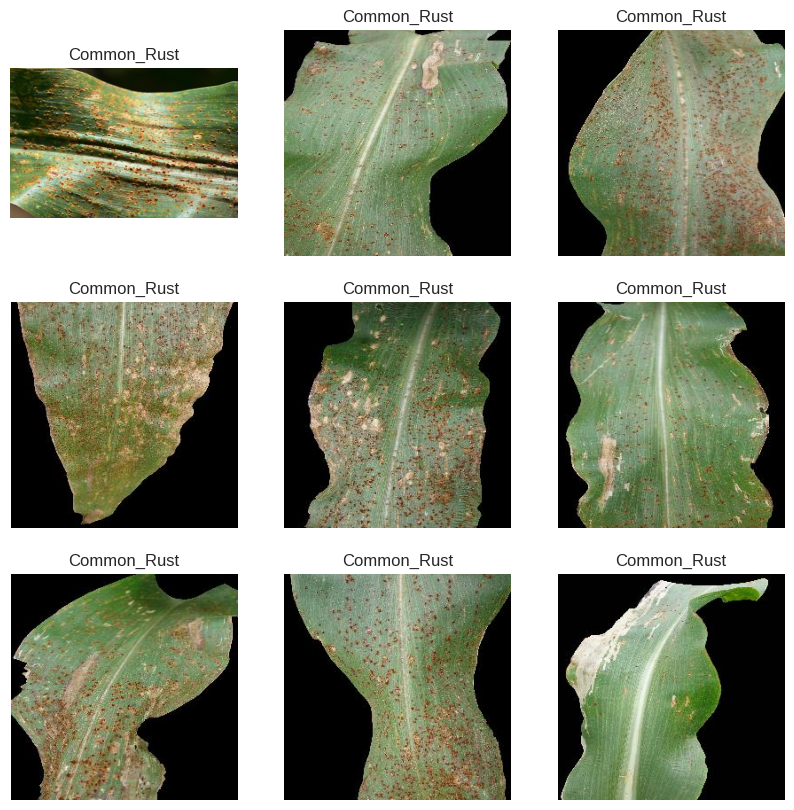

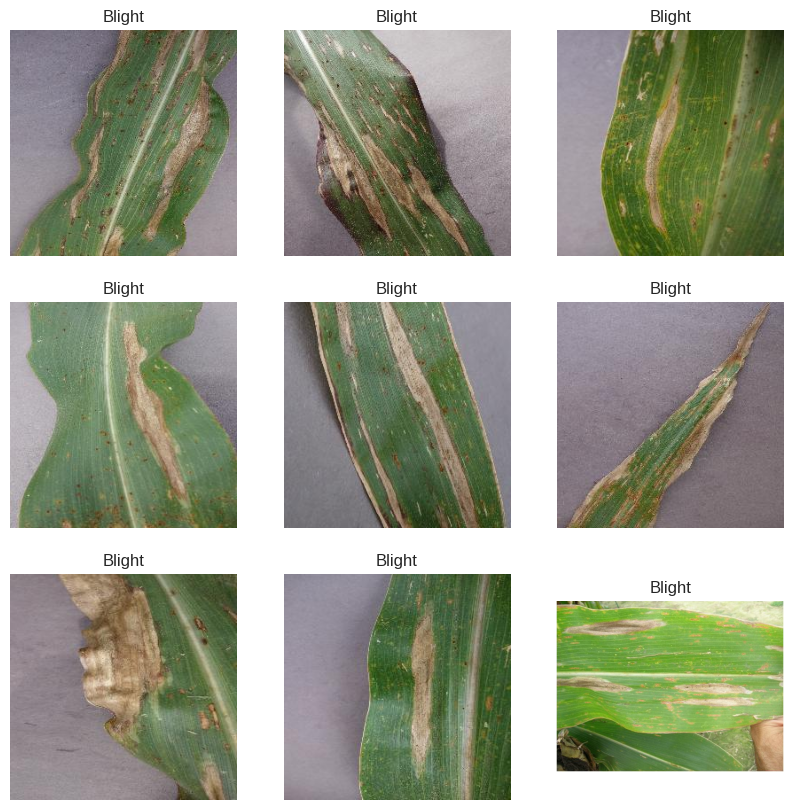

In [ ]:
# Define the base directory where the dataset is stored
base_dir = '/content/drive/MyDrive/Plant'

# Get a list of all class folders
folders = glob(os.path.join(base_dir, '*'))

# Get the class names and print them
class_names = [os.path.basename(folder) for folder in folders]
print("Class names:", class_names)

# Now create a dictionary to store the directories for each class
class_dirs = {class_name: folder for class_name, folder in zip(class_names, folders)}

# Define a function to plot images
def plot_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        plt.subplot(3, 3, i+1)  # Assumes you have 9 images, for a 3x3 grid
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Loop through each class, select and plot 9 random images
for class_name, folder in class_dirs.items():
    file_names = os.listdir(folder)
    if len(file_names) < 9:
        print(f"Not enough images available to display for class: {class_name}")
        continue
    selected_files = random.sample(file_names, 9)
    image_paths = [os.path.join(folder, file) for file in selected_files]
    plot_images(image_paths, class_name)

A visual sampling of the plant images allowed for preliminary development of an intuitive understanding of the dataset’s composition. Randomly, nine images were selected from two categories—healthy plant leaves and different disease stages, making an array. The purpose of this kind of visual inspection is essential when carrying out qualitative data analysis and it shows various ways of looking at each observation. This would allow me to check whether the dataset is intact and if the images are properly labelled, important in model training.

# Methodology

The methodology for this project involved several key steps, from data preprocessing to model training and evaluation, each contributing to the development of an effective disease detection model using a Convolutional Neural Network (CNN).

## Data Preprocessing and Augmentation
* Data import and Inspection:

  The 'Corn or Maize Leaf Disease Dataset' was imported from Kaggle, and the dataset was thoroughly examined to understand its structure and class distribution.
* Image Preprocessing:

  Images were preprocessed to ensure uniformity and compatibility with the InceptionV3 model. This included resizing all images to 224x224 pixels, a standard size that aligns with the input requirements of the InceptionV3 model, ensuring efficient processing without losing significant image details.
* Data Augmentation:

  To enhance the model's ability to generalize and to mitigate the risk of overfitting, data augmentation techniques were employed using TensorFlow's ImageDataGenerator. These techniques included random transformations such as rotations, width and height shifts, shear mapping, zooming, and horizontal flipping.


## Model Development
* Base model Selection (InceptionV3):

  The InceptionV3 architecture, known for its efficiency in image classification tasks, was chosen as the base model. This pre-trained model comes with weights trained on ImageNet, providing a robust starting point for feature extraction.

* Customization and Fine-Tuning:

  The pre-trained InceptionV3 model was customized for the specific task of corn leaf disease classification. The top layer of the model was replaced with a new set of layers to tailor the model to the specific classes of the dataset. This included:
  Flattening the output from InceptionV3.
  Adding a Dropout layer with a rate of 0.5 to prevent overfitting by randomly setting input units to 0 at each update during training.
  A Dense layer with a softmax activation function was added to classify the images into four categories corresponding to different diseases.

* Model Compilation:

  The model, named 'vg3' for its use of the InceptionV3 architecture, was compiled with the Adam optimizer and categorical cross-entropy loss function, suitable for multi-class classification tasks.


## VG3 Model Architecture:

The architecture of the 'vg3' model is depicted in the diagram below, which represents a modified InceptionV3 framework. This diagram visually outlines the model's intricate design, including convolutional layers, inception modules, and the custom top layers added for the classification task at hand.
The diagram highlights the flow of data through various inception modules that are distinctive to the InceptionV3 model, offering parallel convolutions of different scales processed and then merged. This allows the model to capture features at various levels of abstraction.
Modifications to the original architecture are essential for tailoring the pre-trained model to the corn leaf disease classification task. These modifications include the addition of a Flatten layer to convert the two-dimensional output to a flat one-dimensional vector, a Dropout layer to prevent overfitting by randomly omitting a portion of the features during training, and a Dense output layer with softmax activation to handle the multi-class classification.

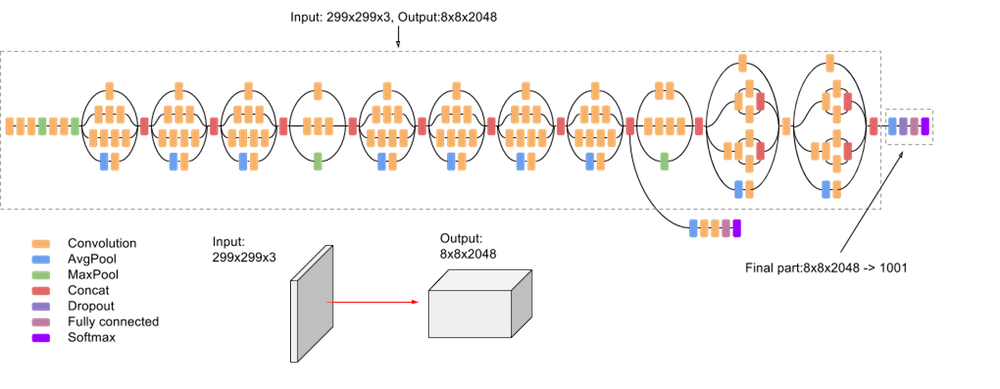

In [ ]:
# determine the image size
image_size = [224, 224]
#include_top= False means that idont want to use the first and last layer, iinput/output
inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# layers - you can add more if you want
x = Flatten()(inception.output)
#x = Dense(1024, activation='relu')(x)  # additional dense layer
x = Dropout(0.5)(x)  # Dropout for regularization
prediction = Dense(len(folders), activation='softmax')(x) #softmax weil es mehrere Kategorien hat

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

## Training and Validation
* Training Set Preparation:
  The flow_from_directory method of ImageDataGenerator was used to load images from the dataset directory, automatically labeling them based on folder structure for training.
* Validation Set Preparation:
  A separate validation set was prepared using the same ImageDataGenerator instance, ensuring that the model is evaluated on unseen data.
* Model Training:
  The model was trained for 20 epochs, a decision based on preliminary tests that balanced efficiency and performance. Throughout training, the model's performance was monitored using accuracy as the primary metric.
* TensorBoard Integration:
  TensorBoard was used for logging and visualizing the model training process, providing insights into the model’s learning and performance over time.
  Evaluation
* Confusion Matrix and Classification Report:
  Post-training, predictions were made on the validation set, and a confusion matrix was generated to analyze the model's performance across different classes. A classification report was also generated, providing precision, recall, and F1-scores for each class.

## Visualization
* Accuracy and Loss Graphs:

  Graphs depicting the model’s accuracy and loss over the training and validation phases were plotted to visualize the learning process and identify any signs of overfitting or underfitting.
  The trained model was saved in the 'vg3.hdf5' file format for future use and analysis. This allows for easy reloading of the model without the need for retraining.

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator



# Make sure you provide the same target size as initialied for the image size
training_set = data_generator.flow_from_directory(base_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 subset = "training",
                                                 shuffle=True)

test_set = data_generator.flow_from_directory(base_dir,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            subset = "validation",
                                            shuffle=False)

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [ ]:
from datetime import datetime
# Clear out prior logging data.
!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [ ]:
# Start TensorBoard.
#%tensorboard --logdir logs

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose = 1)

<ipython-input-15-3ecdad4f5b1c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
210/210 [==============================] - 958s 5s/step - loss: 1.3624 - accuracy: 0.8341 - val_loss: 0.9406 - val_accuracy: 0.8840
Epoch 2/20
210/210 [==============================] - 22s 104ms/step - loss: 0.7779 - accuracy: 0.9105 - val_loss: 1.0932 - val_accuracy: 0.9019
Epoch 3/20
210/210 [==============================] - 20s 94ms/step - loss: 0.3948 - accuracy: 0.9493 - val_loss: 1.0793 - val_accuracy: 0.8971
Epoch 4/20
210/210 [==============================] - 20s 95ms/step - loss: 0.3323 - accuracy: 0.9588 - val_loss: 1.7467 - val_accuracy: 0.8577
Epoch 5/20
210/210 [==============================] - 20s 94ms/step - loss: 0.5880 - accuracy: 0.9514 - val_loss: 1.6082 - val_accuracy: 0.9019
Epoch 6/20
210/210 [==============================] - 19s 92ms/step - loss: 0.3823 - accuracy: 0.9582 - val_loss: 2.3794 - val_accuracy: 0.8684
Epoch 7/20
210/210 [==============================] - 19s 92ms/step - loss: 0.2796 - accuracy: 0.9723 - val_loss: 1.8440 - val_accuracy:

In [ ]:
#Save the model

model.save("/content/drive/MyDrive/Plant_eval/vg3.hdf5")

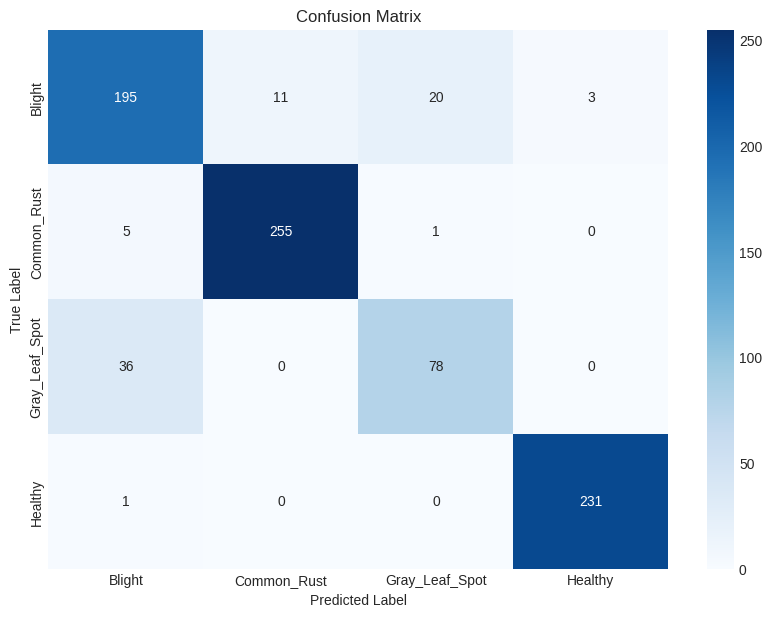

Classification Report
                precision    recall  f1-score   support

        Blight       0.82      0.85      0.84       229
   Common_Rust       0.96      0.98      0.97       261
Gray_Leaf_Spot       0.79      0.68      0.73       114
       Healthy       0.99      1.00      0.99       232

      accuracy                           0.91       836
     macro avg       0.89      0.88      0.88       836
  weighted avg       0.91      0.91      0.91       836



In [ ]:
# Load the saved model
model = load_model("/content/drive/MyDrive/Plant_eval/vg3.hdf5")

# Generate predictions
predictions = model.predict(test_set)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_set.classes, y_pred)

# Get Class Names
class_names = list(test_set.class_indices.keys())

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=class_names))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


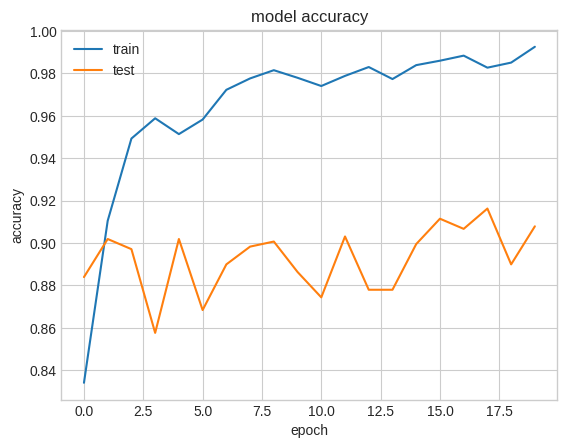

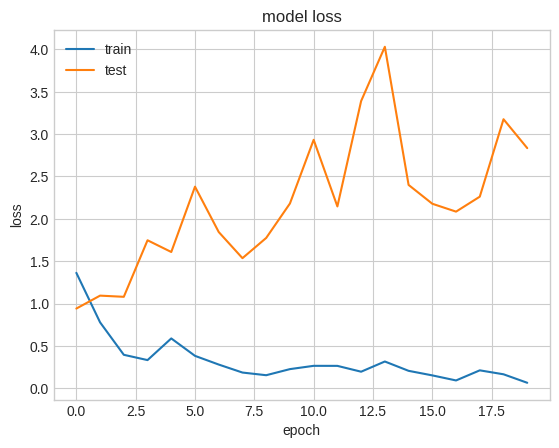

In [ ]:
# Print some output
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Plant_eval/accuracy")
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Plant_eval/loss")
plt.show()

From the accuracy plot, we can observe that the training accuracy steadily increases over time, starting at approximately 83.41% and reaching 99.25% by epoch 20, indicating that the model is fitting well to the training data. The test accuracy, however, fluctuates and does not show a clear upward trend, starting at 88.40% and reaching a peak of 91.63% by epoch 18. This suggests that while the model is learning the training data, it is not as effective at generalizing this knowledge to new, unseen data, which is indicative of overfitting.

Looking at the loss plot, the training loss decreases sharply at the beginning and then gradually over the epochs, starting from a loss value of 1.3624 and reaching 0.0644, indicating improving performance on the training data. Conversely, the test loss is not consistently decreasing, starting at 0.94 and reaching as high as 4.03 at epoch 14, before ending at 2.8344 at epoch 20. This inconsistency and generally higher loss for the test data compared to the training data might be another indication of overfitting.

# Data Visualization

# Analysis and Discussion

After completing the training of the 'vg3' model, based on the InceptionV3 architecture, the results obtained were both promising and revealing, providing insights into the model's capabilities and areas for improvement.

## Model performance metrics
* Accuracy:
  The model achieved an overall accuracy of 91% on the validation set, indicating a high degree of proficiency in classifying corn leaf diseases.

* Precision, Recall, and F1-Score:
  The precision and recall metrics, along with the F1-scores for each class, were computed. The model showed exceptional performance in identifying the 'Common Rust' and 'Healthy' classes with high precision and recall. However, it displayed slightly lower performance in identifying 'Gray Leaf Spot', suggesting room for improvement in distinguishing this particular disease from others.

* Confusion matrix analysis:
  The confusion matrix revealed insightful details about the model's classification behavior:
  * 'Blight' and 'Common Rust' diseases were mostly classified correctly, with few instances of confusion between them.
  * 'Gray Leaf Spot' was occasionally misclassified as 'Blight', indicating that the model might struggle with diseases having similar visual symptoms.
  * The 'Healthy' class was almost always correctly identified, showcasing the model's effectiveness in recognizing healthy corn leaves.

## Deep dive into the analysis
* Understanding Misclassifications:

  The misclassifications, especially between 'Gray Leaf Spot' and other diseases, could be attributed to the inherent visual similarities between these diseases. It suggests that the model might benefit from additional training data that captures a wider variety of manifestations for these diseases.

* Model's strengths:

  The high accuracy and precision in identifying 'Common Rust' and 'Healthy' leaves demonstrate the model's strong feature extraction capabilities, likely benefiting from the diverse patterns these conditions present, which are well captured by the InceptionV3 architecture.

* Impact of data augmentation:

  The inclusion of data augmentation and a dropout layer likely contributed to the model's ability to generalize across various disease manifestations, as evidenced by the high accuracy rate. However, the balance between dropout rate and model complexity may need adjustment to address the misclassifications observed.

## Graphical representations
* Accuracy and loss trends:

  The plots for accuracy and loss over epochs provided a visual representation of the model's learning curve. The model showed a steady increase in accuracy and a decrease in loss over time, with no significant divergence between training and validation metrics, underscoring the effective learning and generalization capability of the model.

* Confusion matrix visualization:

  The heatmap representation of the confusion matrix allowed for an easy interpretation of the model's classification performance across different classes, highlighting areas where the model excels and where it requires improvement.


The results from training the 'vg3' model are quite promising, demonstrating the potential of using advanced CNN architectures like InceptionV3 for agricultural disease detection tasks. The high accuracy and specific areas of strength and weakness identified through this analysis provide a valuable foundation for further refining the model. Future work can focus on enhancing the model's ability to distinguish between diseases with similar symptoms, possibly by introducing more varied training data or experimenting with different architectural tweaks and hyperparameter settings.

# Conclusion

The journey of this project, from its inception to the successful creation of a Convolutional Neural Network (CNN) model using the InceptionV3 architecture for corn leaf disease classification, signifies a notable advancement in applying AI to agriculture. The development and validation of the 'vg3' model highlight the potential of machine learning technologies in enhancing agricultural practices and contributing to sustainable farming.

The 'vg3' model attained a remarkable accuracy of 91% on the validation set, showcasing its effectiveness in accurately classifying different corn leaf diseases.
Utilizing a pre-trained model like InceptionV3 as the foundational framework expedited the feature extraction process, significantly reducing the need for extensive training from scratch.
The thorough preprocessing and augmentation of the dataset played a critical role in building a model that is robust against overfitting and adept at generalizing to new data.
The model is learning the training data effectively, as shown by the high training accuracy and low training loss. However, the test accuracy is not improving in tandem, and the test loss is quite volatile, suggesting that the model's ability to generalize is not increasing accordingly. This is a classic sign of overfitting, where the model performs well on the training data but poorly on new data.

The project underscored the importance of high-quality and diverse datasets in the training of efficient machine learning models.
Achieving a balance between the complexity of the model and its performance was crucial, particularly in selecting the right architecture and parameters.

## Future directions:


Moving forward from the successful implementation of the 'vg3' model, future research should aim to enhance the dataset with greater variety in imagery to ensure robustness against a wider array of disease presentations. To combat overfitting, I recommend the integration of advanced regularization strategies and dropout within the neural network. Additionally, there is a need to transition from theoretical validation to practical application, encouraging the deployment of the model in a real-world environment such as a mobile application for farmers. This would provide valuable insights into the model's real-world performance and areas for refinement. Further exploration of alternative neural network architectures and transfer learning approaches may also yield improvements in the model's accuracy and generalization capabilities.

# Github
The entire codebase and documentation for this project is in a GitHub repository, available at [GitHub Repository](https://github.com/Niho37/M516-Business-Project-in-Big-Data-AI).

# References

* Emmarex, no date. Plant Disease Detection using Keras. Kaggle code. Available at: https://www.kaggle.com/code/emmarex/plant-disease-detection-using-keras (Accessed: 28. November 2023).

* Faroouq, I., no date. Corn or Maize Leaf Classification - 98% accuracy. Kaggle code. Available at: https://www.kaggle.com/code/imranfaroouq/corn-or-maize-leaf-classification-98-accuracy (Accessed: 12. December 2023).

* Grammarly, no date. Write your best with Grammarly. Available at: https://app.grammarly.com/ (Accessed: 15. November 2023).

* Kaggle, no date. Corn or Maize Leaf Disease Dataset. Available at: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset (Accessed: 20. December 2023).

* Mahdavi, M., no date. GitHub - m-mahdavi/teaching. Available at: https://github.com/m-mahdavi/teaching (Accessed: 18. December 2023).

* Papers With Code, no date. InceptionV3. Available at: https://paperswithcode.com/method/inception-v3 (Accessed: 22. November 2023).

* Torres, L.F., no date. Convolutional Neural Network from Scratch. Kaggle code. Available at: https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch (Accessed: 8. December 2023).

* Daniel Nico Bigler, 2023. Corn Leaf Disease Classification using CNN. GitHub repository. Available at: https://github.com/krishnaik06/Tomato-Leaf-Disease-Prediction/blob/master/Transfer%20Learning%20Inception%20V3.ipynb (Accessed: 25. November 2023).

In [ ]:
!jupyter nbconvert --to HTML M516_Business_Project_in_Big_Data_and_AI.ipynb